In [16]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


In [17]:
cdata = pd.read_csv("covid_early_stage_symptoms.csv",low_memory=False)


In [18]:
cdata.head()

,gender,age_year,fever,cough,runny_nose,muscle_soreness,pneumonia,diarrhea,lung_infection,travel_history,isolation_treatment,SARS-CoV-2 Positive
0,male,89,1,1,0,0,0,0,0,1,0,0
1,male,68,1,0,0,0,0,0,0,0,0,0
2,male,68,0,0,0,0,0,0,0,1,0,0
3,male,68,1,1,0,0,0,0,0,1,1,1
4,male,50,1,1,1,0,1,0,0,1,0,1


In [19]:
cdata.info()
#cdata = cdata.drop(["test_date"],axis=1)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6512 entries, 0 to 6511
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   gender               6512 non-null   object
 1   age_year             6512 non-null   int64 
 2   fever                6512 non-null   int64 
 3   cough                6512 non-null   int64 
 4   runny_nose           6512 non-null   int64 
 5   muscle_soreness      6512 non-null   int64 
 6   pneumonia            6512 non-null   int64 
 7   diarrhea             6512 non-null   int64 
 8   lung_infection       6512 non-null   int64 
 9   travel_history       6512 non-null   int64 
 10  isolation_treatment  6512 non-null   int64 
 11  SARS-CoV-2 Positive  6512 non-null   int64 
dtypes: int64(11), object(1)
memory usage: 610.6+ KB


In [20]:
cdata.shape

(6512, 12)

In [21]:
cdata.shape

(6512, 12)

In [22]:
cdata['SARS-CoV-2 Positive'].value_counts()


0    4940
1    1572
Name: SARS-CoV-2 Positive, dtype: int64

In [23]:
pd.Series({col:cdata[col].unique() for col in cdata})


gender                                                    [male, female]
age_year               [89, 68, 50, 55, 48, 49, 44, 39, 47, 45, 59, 7...
fever                                                             [1, 0]
cough                                                             [1, 0]
runny_nose                                                        [0, 1]
muscle_soreness                                                   [0, 1]
pneumonia                                                         [0, 1]
diarrhea                                                          [0, 1]
lung_infection                                                    [0, 1]
travel_history                                                    [1, 0]
isolation_treatment                                               [0, 1]
SARS-CoV-2 Positive                                               [0, 1]
dtype: object

In [24]:
symptoms_g = ["Fever","Cough","Tiredness" ,"loss  taste smell","Shortness  breath" ,"difficulty breathing","Muscle aches","pneumonia",
"Chills","Sore throat","Runny nose","head ache","Chest pain","conjunctivitis","Nausea","Vomiting","Diarrhea","Rash","nasal congestion","bodypain"]
basic_info =["gender","country","age"]
cdata.columns = [i.lower() for i in cdata.columns ]
def filter(a):
    a = [i.lower() for i in a]
    a = [i.replace(" ",",") for i in a]
    a= [i.split(',') for i in a]
    b=[i for i in cdata.columns]
    b = [i.lower() for i in b]
    m=[]
    for y in b:
        for i in a:
            for c in i:
                if (c in y) and c!="":
                    m.append(c)
    final = list(set(y for y in b for i in m if i in y))
    return final

symptoms= filter(symptoms_g)
basic =filter(basic_info)
print("symptoms: ",symptoms)
print("basic info: ",basic)
u = basic + symptoms
other_factors = [y for y in cdata.columns  if y not in u  ]
print("other factors: ",other_factors)

symptoms:  ['muscle_soreness', 'cough', 'diarrhea', 'fever', 'runny_nose', 'pneumonia']
basic info:  ['gender', 'age_year']
other factors:  ['lung_infection', 'travel_history', 'isolation_treatment', 'sars-cov-2 positive']


In [25]:
from sklearn import preprocessing
 
label_encoder = preprocessing.LabelEncoder()
 
# Encode labels in column 'species'.
cdata = cdata.apply(label_encoder.fit_transform)
 
cdata.head(10)

,gender,age_year,fever,cough,runny_nose,muscle_soreness,pneumonia,diarrhea,lung_infection,travel_history,isolation_treatment,sars-cov-2 positive
0,1,88,1,1,0,0,0,0,0,1,0,0
1,1,67,1,0,0,0,0,0,0,0,0,0
2,1,67,0,0,0,0,0,0,0,1,0,0
3,1,67,1,1,0,0,0,0,0,1,1,1
4,1,49,1,1,1,0,1,0,0,1,0,1
5,1,49,1,1,0,0,0,0,0,0,0,1
6,0,54,1,1,0,0,0,0,0,0,0,0
7,0,54,0,0,0,0,0,0,0,1,0,0
8,0,54,1,1,0,0,0,0,0,0,0,1
9,0,47,1,1,0,0,0,0,0,1,0,0


<AxesSubplot:>

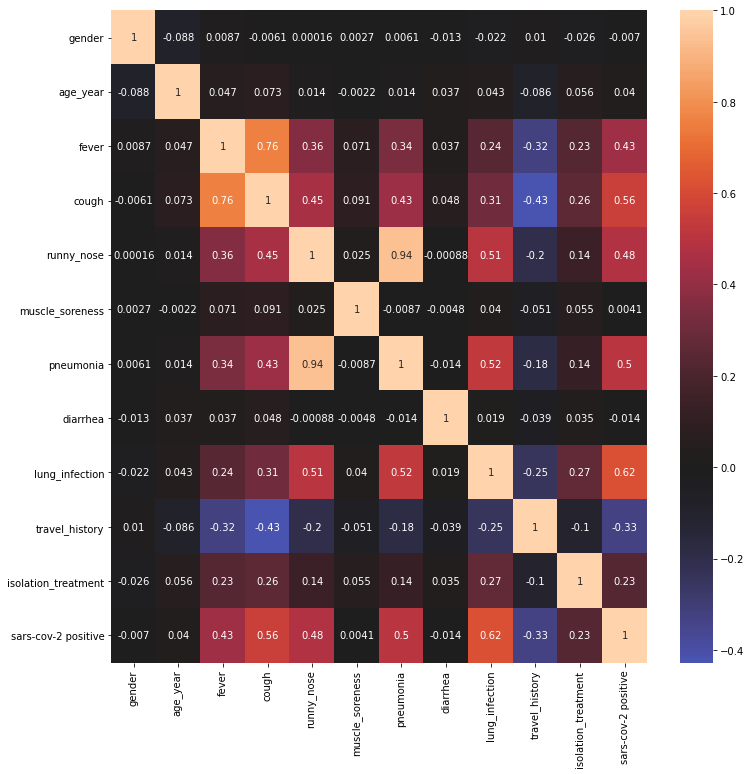

In [26]:
fig, ax = plt.subplots(figsize=(12,12))         # Sample figsize in inches
sns.heatmap(cdata.corr(),annot =True,ax=ax,center = 0)

In [27]:
corr=cdata.corr().style.background_gradient().set_precision(2)

corr

,gender,age_year,fever,cough,runny_nose,muscle_soreness,pneumonia,diarrhea,lung_infection,travel_history,isolation_treatment,sars-cov-2 positive
gender,1.00,-0.09,0.01,-0.01,0.00,0.00,0.01,-0.01,-0.02,0.01,-0.03,-0.01
age_year,-0.09,1.00,0.05,0.07,0.01,-0.00,0.01,0.04,0.04,-0.09,0.06,0.04
fever,0.01,0.05,1.00,0.76,0.36,0.07,0.34,0.04,0.24,-0.32,0.23,0.43
cough,-0.01,0.07,0.76,1.00,0.45,0.09,0.43,0.05,0.31,-0.43,0.26,0.56
runny_nose,0.00,0.01,0.36,0.45,1.00,0.02,0.94,-0.00,0.51,-0.20,0.14,0.48
muscle_soreness,0.00,-0.00,0.07,0.09,0.02,1.00,-0.01,-0.00,0.04,-0.05,0.06,0.00
pneumonia,0.01,0.01,0.34,0.43,0.94,-0.01,1.00,-0.01,0.52,-0.18,0.14,0.50
diarrhea,-0.01,0.04,0.04,0.05,-0.00,-0.00,-0.01,1.00,0.02,-0.04,0.03,-0.01
lung_infection,-0.02,0.04,0.24,0.31,0.51,0.04,0.52,0.02,1.00,-0.25,0.27,0.62
travel_history,0.01,-0.09,-0.32,-0.43,-0.20,-0.05,-0.18,-0.04,-0.25,1.00,-0.10,-0.33


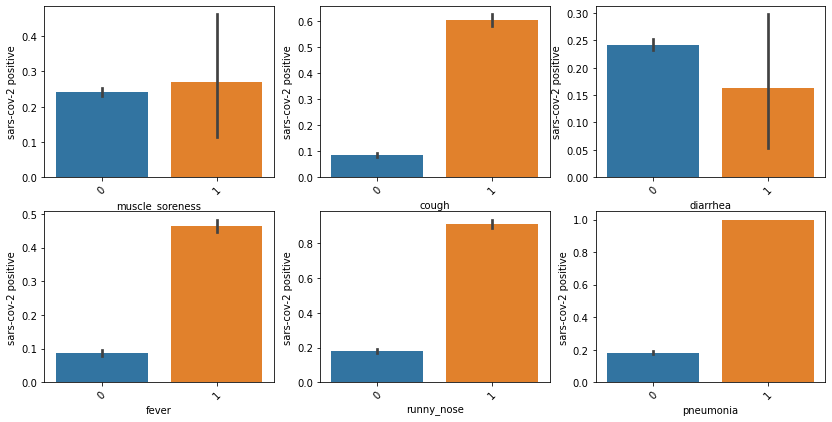

In [28]:

plt.figure(figsize = (14,22))
for j in enumerate(symptoms):
    plt.subplot(6, 3,j[0]+1)
    sns.barplot(x=j[1],y=cdata["sars-cov-2 positive"], data = cdata)
    plt.xticks(rotation = 45)

In [42]:
X = cdata.drop(["sars-cov-2 positive","fever","pneumonia","age_year"],axis=1)
y= cdata["sars-cov-2 positive"]
X.head()

,gender,cough,runny_nose,muscle_soreness,diarrhea,lung_infection,travel_history,isolation_treatment
0,1,1,0,0,0,0,1,0
1,1,0,0,0,0,0,0,0
2,1,0,0,0,0,0,1,0
3,1,1,0,0,0,0,1,1
4,1,1,1,0,0,0,1,0


In [43]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X = scaler.fit_transform(X)
X

array([[1., 1., 0., ..., 0., 1., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 1., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [1., 1., 0., ..., 0., 0., 1.]])

In [44]:
from sklearn.decomposition import PCA
pca = PCA()
pca.fit_transform(X)

array([[ 8.76323046e-02, -5.01837446e-01,  8.05980557e-02, ...,
        -2.14711748e-01, -8.45230407e-03, -1.15818568e-02],
       [ 5.01728905e-02, -5.01482906e-01, -5.98154399e-01, ...,
         8.94656401e-02, -4.18930318e-03, -8.55740561e-04],
       [-5.46064905e-01, -4.61662430e-01,  9.84302807e-03, ...,
         5.27924630e-03, -9.39430722e-04,  7.97291283e-04],
       ...,
       [ 9.29941411e-02,  4.96319618e-01, -6.41450978e-01, ...,
         9.59775589e-02, -5.96158909e-03, -3.16172933e-04],
       [ 7.26691351e-01,  4.56144602e-01, -5.70695950e-01, ...,
        -1.24013436e-01, -1.34744624e-02, -1.26953211e-02],
       [ 9.80335845e-01, -5.11217777e-01,  2.19835860e-01, ...,
        -2.86834457e-02, -1.56640652e-02, -1.82336261e-02]])

In [45]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=7)

In [46]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier()
#dt= GridSearchCV(d_t,param_grid=parameters)

dt.fit(X_train,y_train.values)
Y_pred_dt = dt.predict(X_test)
   
        
score_dt = round(accuracy_score(Y_pred_dt,y_test)*100,2)

print("The accuracy score achieved using Decision Tree is: "+str(score_dt)+" %")

The accuracy score achieved using Decision Tree is: 89.56 %


In [47]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn import metrics

LR_model= LogisticRegression(solver='lbfgs',max_iter=700)

tuned_parameters = {'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]   }

from sklearn.model_selection import GridSearchCV

LR= GridSearchCV(LR_model, tuned_parameters,cv=10)
LR.fit(X_train,y_train)

y_prob = LR.predict_proba(X_test)[:,1] # This will give you positive class prediction probabilities  
y_pred = np.where(y_prob > 0.5, 1, 0) # This will threshold the probabilities to give class predictions.
from sklearn.metrics import roc_curve, auc
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(false_positive_rate, true_positive_rate)
score_dt = round(roc_auc*100,2)
print("The accuracy score achieved using logistic regression is: "+str(score_dt)+" %")

The accuracy score achieved using logistic regression is: 93.6 %


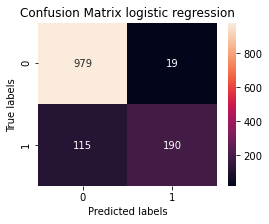

In [37]:
from sklearn import metrics
fig, ax = plt.subplots(figsize=(4,3))  
confusion_matrix=metrics.confusion_matrix(y_test,y_pred)
sns.heatmap(confusion_matrix, annot=True,fmt='g',ax=ax,)
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix logistic regression'); 

In [1]:
fig, ax = plt.subplots(figsize=(4,3))  
confusion_matrix=metrics.confusion_matrix(y_test,Y_pred_dt)
sns.heatmap(confusion_matrix, annot=True,fmt='g',ax=ax,cmap='Purples')
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix decision tree'); 

NameError: name 'plt' is not defined

In [41]:
#decision tree
zc=0
oc=0
for i in range(len(X_test)):
    features = np.array([X_test[i]])
    prediction = dt.predict(features)
    if prediction == 0:
        zc+=1
    else:
        oc+=1
print("infected: ", oc)
print("not infected: ", zc)

infected:  224
not infected:  1079


In [40]:
#logistic regression

zc=0
oc=0
for i in range(len(X_test)):
    features = np.array([X_test[i]])
    prediction = LR.predict(features)
    if prediction == 0:
        zc+=1
    else:
        oc+=1
print("infected: ", oc)
print("not infected: ", zc)

infected:  209
not infected:  1094
